Shape del dataset: (303, 14)

Tipos de datos:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

Valores nulos:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Descripción estadística:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25% 

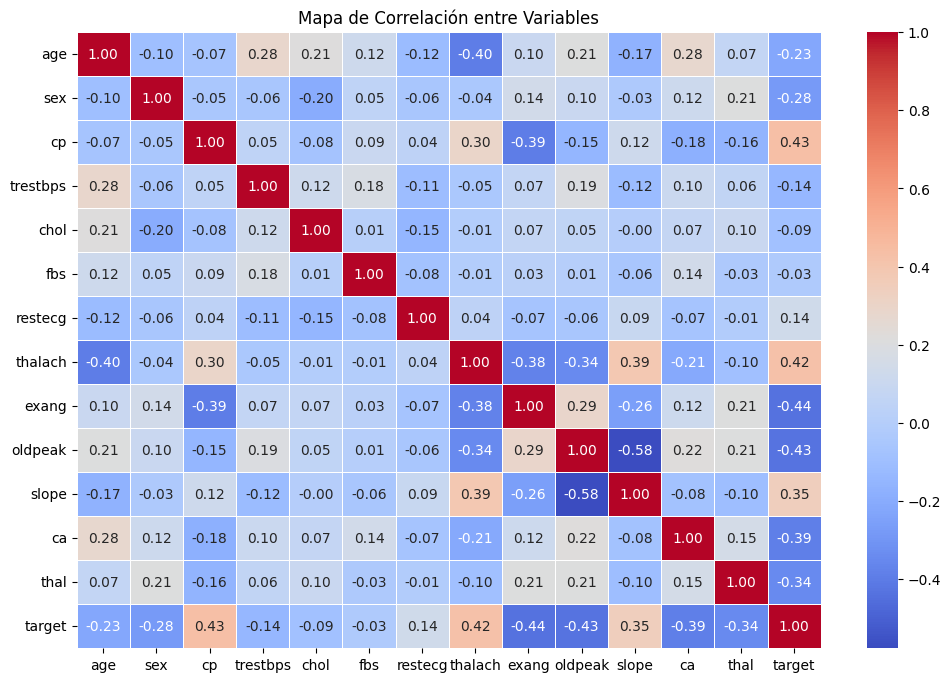

🔍 Modelo: Logistic Regression
🔢 Accuracy: 0.80
📋 Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76        28
         1.0       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



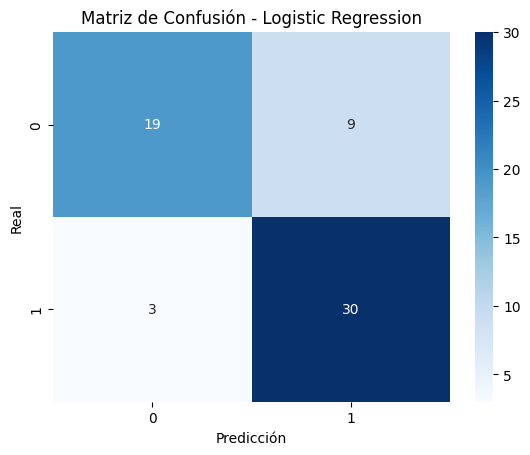

🔍 Modelo: Random Forest
🔢 Accuracy: 0.82
📋 Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.90      0.68      0.78        28
         1.0       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



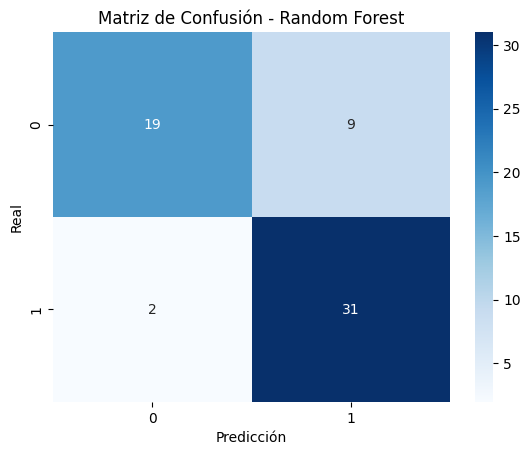

🔍 Modelo: SVM
🔢 Accuracy: 0.82
📋 Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.90      0.68      0.78        28
         1.0       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



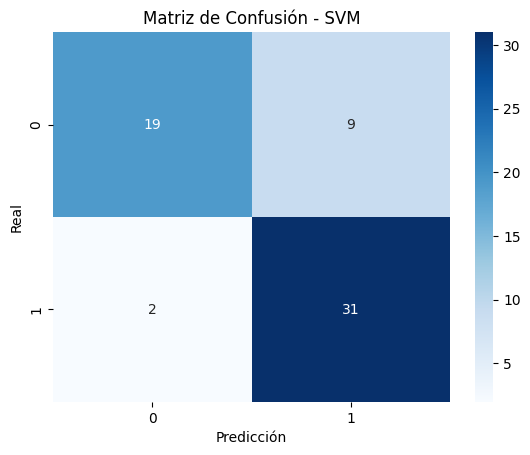

🔍 Modelo: KNN
🔢 Accuracy: 0.80
📋 Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76        28
         1.0       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



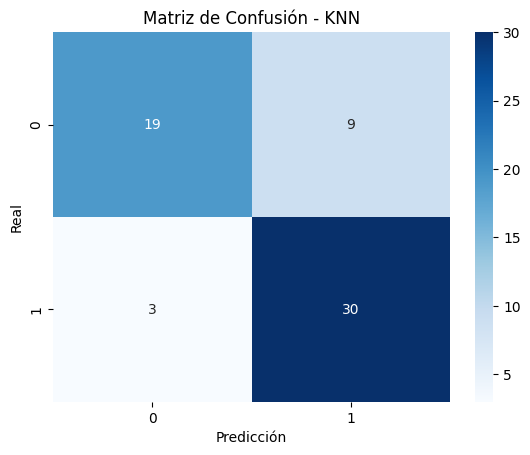

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        29
         1.0       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

✅ Modelo guardado como heart_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Modelo y escalador guardados exitosamente.


In [6]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df.to_csv("heart.csv", index=False)

# 1. Cargar el dataset desde OpenML
data = fetch_openml(name='heart-disease', version=1, as_frame=True)
df = data.frame

# 2. Mostrar las primeras filas
df.head()

print("Shape del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

# Verificar si hay valores faltantes
print("\nValores nulos:")
print(df.isnull().sum())

# Estadísticas básicas
print("\nDescripción estadística:")
print(df.describe())

# Distribución de la variable objetivo
print("\nDistribución de la variable 'target':")
print(df['target'].value_counts())

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Generar el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación entre Variables')
plt.show()

X = df.drop("target", axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entrenamiento y evaluación
for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    print(f"🔍 Modelo: {nombre}")
    print(f"🔢 Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("📋 Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from google.colab import files

# 1. Cargar el dataset
df = pd.read_csv("heart.csv")

# 2. Separar variables predictoras y objetivo
X = df.drop("target", axis=1)
y = df["target"]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Evaluar
y_pred = model.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# 6. Guardar el modelo
joblib.dump(model, "heart_model.pkl")
print("✅ Modelo guardado como heart_model.pkl")

# 7. Descargar el archivo
files.download("heart_model.pkl")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# 1. Cargar el dataset
df = pd.read_csv("heart.csv")  # Asegúrate de que esté en el mismo directorio

# 2. Separar variables predictoras (X) y objetivo (y)
X = df.drop("target", axis=1)
y = df["target"]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Ajustar escalador solo con datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 5. Entrenar modelo (por ejemplo, Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Guardar modelo entrenado y escalador
joblib.dump(model, "heart_model.pkl")
joblib.dump(scaler, "escalador.pkl")

print("✅ Modelo y escalador guardados exitosamente.")
